# Lazyfit 2D fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lazyfit

# Test case: 2D gaussian

As an example, consider a Gaussian distribution as a function of x and y coordinates.
This is a multivariate distribution with 2 parameters, [https://en.wikipedia.org/wiki/Multivariate_normal_distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)

In [2]:
# test data parameters
A = 256 # peak amplitude
x0 = 0.5 # peak position in x
y0 = -1 # peak position in y
sx = 1 # standard deviation in x
sy = 0.5 # standard deviation in y
p = 0.2 # linear correlation coeffecient 
B = 50 # constant background

x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 1, 90)
xmat, ymat = np.meshgrid(x, y) # create and x and y mesh
z = np.random.poisson(lam=lazyfit.models2d.gaussian2d.f(xmat, ymat, A, x0, y0, sx, sy, p, B)) # add poisson noise
dz = np.sqrt(z)

In [3]:
z.shape # dimension of data

(90, 100)

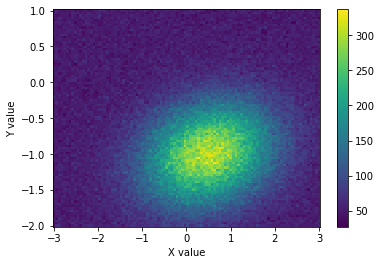

In [4]:
# plot data
plt.pcolormesh(x, y, z, shading='nearest')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.colorbar()

# Fitting

Create a lazyfit Wrapper2d using the same syntax as for 1d, except now we supply a 1d array of x-data, and 1d array  of y-data and a 2d array of z-data (plus optional z errors)

In [5]:
fit = lazyfit.fit2d('gaussian2d', x, y, z, dz) 

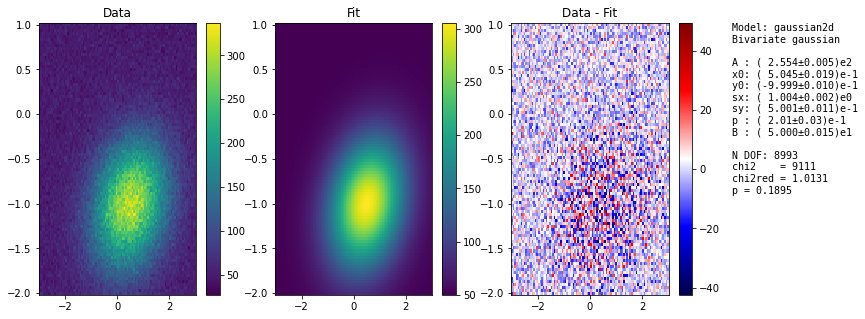

In [6]:
fit.plot();

## Plotting guess

To check if the fitting guess is good, you can plot the guess in an additional panel:

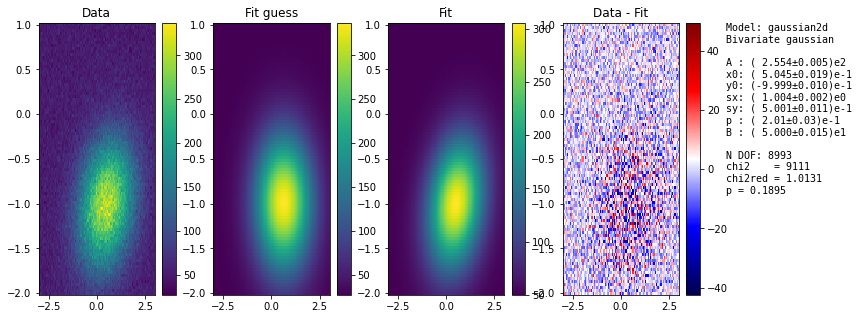

In [7]:
fit.plot(plot_guess=True);

# Retrieving fit parameters 

Exactly the same functionality as 1D

In [8]:
fit.params # get fit parameters in the order they are specified in the fit model

array([ 2.55356175e+02,  5.04475254e-01, -9.99856735e-01,  1.00385778e+00,
        5.00111279e-01,  2.01341370e-01,  4.99964606e+01])

In [9]:
fit.errors # get errors on the fit parameters (this is the square root of the covariance matrix diagonal)

array([0.49379138, 0.00192449, 0.00096749, 0.00221755, 0.00112389,
       0.00262656, 0.15214594])

In [10]:
fit.params_dict # get fit paramters as a dictionary

{'A': 255.3561753141514,
 'x0': 0.5044752540448703,
 'y0': -0.9998567345973121,
 'sx': 1.003857781365424,
 'sy': 0.5001112785883473,
 'p': 0.20134136998559385,
 'B': 49.99646058540826}

In [11]:
fit.errors_dict # fit errors as a dictionary

{'A': 0.49379138491773134,
 'x0': 0.0019244916074491717,
 'y0': 0.0009674928370823717,
 'sx': 0.002217554482937984,
 'sy': 0.0011238900185891625,
 'p': 0.0026265598911120107,
 'B': 0.15214594217600969}

In [12]:
fit.COVB # covarience matrix

array([[ 2.43829932e-01,  1.85840562e-07,  9.28479455e-06,
        -4.44190806e-04, -2.35528610e-04, -9.58145222e-06,
        -4.78065078e-03],
       [ 1.85840562e-07,  3.70366795e-06,  3.78314120e-07,
         4.37904344e-10, -2.49604673e-08, -3.21388030e-08,
         2.43740023e-06],
       [ 9.28479455e-06,  3.78314120e-07,  9.36042390e-07,
         3.23045363e-08, -2.68908335e-08, -1.57550318e-08,
        -4.70422722e-06],
       [-4.44190806e-04,  4.37904344e-10,  3.23045363e-08,
         4.91754788e-06,  6.30517369e-07,  7.03791399e-07,
        -1.63536469e-04],
       [-2.35528610e-04, -2.49604673e-08, -2.68908335e-08,
         6.30517369e-07,  1.26312877e-06,  3.67141395e-07,
        -7.74957491e-05],
       [-9.58145222e-06, -3.21388030e-08, -1.57550318e-08,
         7.03791399e-07,  3.67141395e-07,  6.89881686e-06,
         6.74700526e-06],
       [-4.78065078e-03,  2.43740023e-06, -4.70422722e-06,
        -1.63536469e-04, -7.74957491e-05,  6.74700526e-06,
         2.3148387

# Predictions

Evaluate the fit model for 1d arrays of inputs:

In [13]:
fit.predict(np.array([0, 0.5]), np.array([-1,-0.5]))

array([273.8703462 , 201.57724534])

Alternatively, you can specify a list of x and y values and evaluate the model for the 2d-array of input values formed by the inputs

In [14]:
fit.predict_mesh(np.array([0, 0.5]), np.array([-1,-0.5]))

array([[273.8703462 , 305.35004871],
       [169.70437545, 201.57724534]])

# Inspect fit model

In [16]:
fit.model

<LazyFitModel2d "gaussian2d". Fit parameters: ['A', 'x0', 'y0', 'sx', 'sy', 'p', 'B'].